In [20]:
# Task 1 — Load and inspect the dataset

# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some default styles for our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [21]:
# Load the dataset
# Make sure the 'online_retail.csv' file is in a reachable path, e.g., ../data/
try:
    df = pd.read_csv('../data/online_retail.csv', encoding='ISO-8859-1')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
    # As a fallback for demonstration, create an empty dataframe with correct columns
    df = pd.DataFrame(columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])

Dataset loaded successfully.


In [22]:
# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display the number of rows and columns
print(f"\nDataset dimensions (rows, columns): {df.shape}")

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Display basic data types and non-null counts
print("\nBasic data types and info:")
df.info()

First 5 rows of the dataset:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom



Dataset dimensions (rows, columns): (525461, 8)

Column names:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Basic data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Written Explanation

What a single row represents in the real world:

A single row in this dataset represents a single line item on an invoice. The system tracks each individual product which users purchase by showing StockCode and Description information together with the Quantity and UnitPrice of the product during a complete transaction. The system tracks each individual product which users purchase by showing StockCode and Description information together with the Quantity and UnitPrice of the product during a complete transaction.

Why multiple rows may share the same Invoice and Customer ID:

Multiple rows share the same InvoiceNo because a customer's shopping basket or transaction (the "invoice") typically contains more than one type of product. Each product line gets its own row. The same InvoiceNo links all these rows because they stem from one transaction, while the CustomerID links them all together because the same customer made the purchases at the same time.

Task 2 - Define the unit of analysis

Plausible Units of Analysis

1. Invoice Line:  The most detailed information exists in its most granular form. The analysis enables us to evaluate product performance through their respective price points and quantity sold at each line item. The complete context of the transaction disappears when all information about the transaction is removed. The total value of the customer's basket remains unknown together with the number of items purchased and the details of the entire purchase event. The approach of treating each row as a separate entity leads to both erroneous results and false information.

2. Basket Level:  The unit functions as a standalone unit of measurement which needs to be treated as one complete financial transaction. The aggregation of all rows sharing the same InvoiceNo enables us to determine essential transaction metrics which include total basket value and basket breadth and basket size. The market basket analysis process requires this specific data analysis method.
The product-level information gets lost through the process of product aggregation. The system considers every transaction as an individual event which results in the loss of extended customer relationship tracking.

3. Customer Level:  The process of collecting all invoices associated with each CustomerID allows us to create a complete customer profile. The system enables us to measure Customer Lifetime Value (CLV) and total product sales together with customer buying patterns and their preferred items. This information serves as a fundamental requirement for analyzing customer groups and their ability to maintain existing customers.
The process leads to the elimination of all data that describes particular transactions. The system does not provide information about the contents and worth of particular shopping baskets which customers purchased at specific times. The system creates a complete overview that displays all customer activities throughout their entire relationship with the company.

Decision

The chosen unit of analysis will be the Invoice / Basket

The selected option delivers optimal results because it shows both detailed information and complete business context necessary to answer various business inquiries. The study directly respects the dataset's transactional framework which the project brief specifically described. Our research should concentrate on basket analysis because it enables us to better understand purchasing patterns which serve as a more valuable indicator than average line-item costs. The analysis unit functions as a fundamental requirement that enables advanced methods such as Market Basket Analysis which detects shared purchases to operate while delivering comprehensive data needed to forecast upcoming buying patterns. The system operates as a fundamental step that connects the current state with the upcoming aggregation process.

Task 3 – Data quality and validity audit

In [25]:
print(f"Number of rows with missing Customer ID: {df['Customer ID'].isnull().sum()}")
print(f"Percentage of rows with missing Customer ID: {df['Customer ID'].isnull().sum() / len(df) * 100:.2f}%")

Number of rows with missing Customer ID: 107927
Percentage of rows with missing Customer ID: 20.54%


Issue 1: Missing Customer IDs

The report shows that multiple rows in the dataset lack Customer ID information. The report shows that more than 20 percent of entries in the database do not contain Customer ID information. The absence of this Customer ID prevents any possibility to connect a transaction with its specific customer, which stops all customer-level research efforts. The plan requires us to eliminate all entries that do not have a complete Customer ID record.

In [26]:
print(f"Number of rows with negative quantity: {len(df[df['Quantity'] <= 0])}")

Number of rows with negative quantity: 12326


Issue 2: Cancellations and Negative Quantities

The cancellation of some invoices happens when their values use the letter 'C' at the beginning to show a negative quantity. The reason for importance exists because businesses should treat cancellations and returns as non-sales activities. The research needs to exclude these specific transactions because they would lead to inaccurate reductions of both sales metrics and product popularity measurements. Our main sales dataset will be divided into two parts through our plan because we will retain only those transactions which contain positive quantity records.

In [27]:
print(f"Number of rows with a Price of zero: {len(df[df['Price'] == 0])}")

Number of rows with a Price of zero: 3687


Issue 3: Zero Unit Price

Some items have been assigned a Price value which shows 0.0. Zero-price items create problems because they do not produce revenue which leads to incorrect calculations of average order value. The items might be either promotional products or they could be errors in data entry. The filter will remove these specific rows from our research about commercial transactions.

Task 4 – Minimal, justified cleaning

In [30]:
# Create a copy to preserve the original dataframe
df_clean = df.copy()

print(f"Original number of rows: {df_clean.shape[0]}")

# --- Cleaning Step 1: Handle Missing Customer IDs ---
df_clean.dropna(subset=['Customer ID'], inplace=True)
print(f"Rows after removing missing Customer IDs: {df_clean.shape[0]}")

# --- Cleaning Step 2: Handle Cancellations/Returns (Negative Quantity) ---
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"Rows after removing returns/negative quantities: {df_clean.shape[0]}")

# --- Cleaning Step 3: Handle Zero Unit Price ---
df_clean = df_clean[df_clean['Price'] > 0]
print(f"Rows after removing zero price items: {df_clean.shape[0]}")

# --- Final Data Type Conversion ---
df_clean['Customer ID'] = df_clean['Customer ID'].astype(int)

# --- Robust parsing of InvoiceDate (handles DD/MM/YYYY formats) ---
# Use dayfirst=True to correctly parse dates like '13/12/2009 09:58'
# Use errors='coerce' to set unparsable values to NaT so we can inspect/drop them
# This prevents ValueError when mixing day-first and month-first dates
from IPython.display import display

df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], dayfirst=True, errors='coerce')

# Report and handle any unparsable dates
num_invalid_dates = df_clean['InvoiceDate'].isna().sum()
if num_invalid_dates > 0:
    print(f"Warning: {num_invalid_dates} rows have invalid or unparseable InvoiceDate values and were set to NaT.")
    display(df_clean.loc[df_clean['InvoiceDate'].isna()].head())
    # If your analysis requires valid dates, drop these rows
    df_clean = df_clean.dropna(subset=['InvoiceDate'])
    print(f"Rows after dropping invalid InvoiceDate: {df_clean.shape[0]}")

print(f"\nFinal number of clean rows: {df_clean.shape[0]}")

Original number of rows: 525461
Rows after removing missing Customer IDs: 417534
Rows after removing returns/negative quantities: 407695
Rows after removing zero price items: 407664

Final number of clean rows: 407664


Evidence Requirement

1. Handling Missing Customer IDs

Impact of Choice: We removed a significant number of rows (over 100,000), but the impact is positive: our resulting dataset is now fully attributable at the customer level. The system allows identification of each transaction with an associated customer.

2. Separating Returns from Purchases

The dataset now contains actual sales data because we eliminated all rows that contained negative quantity data. The process guarantees accurate calculations which track revenue and product popularity throughout the entire system.

Task 5 — Exploratory Data Analysis (EDA)

In [31]:
# --- Pre-computation for EDA ---
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['Price']

EDA Output 1: A Temporal Pattern (Monthly Revenue)

Question: How does total revenue change on a monthly basis?

Pattern: Revenue reaches its highest point during the final three months of the year between October and November because of increased holiday shopping activity.

Limitation: With only one full year of data we cannot definitively confirm this seasonal trend is a recurring pattern.

C:\Users\HP\AppData\Local\Temp\ipykernel_21060\1709876419.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_clean.set_index('InvoiceDate').groupby(pd.Grouper(freq='M'))['Revenue'].sum()


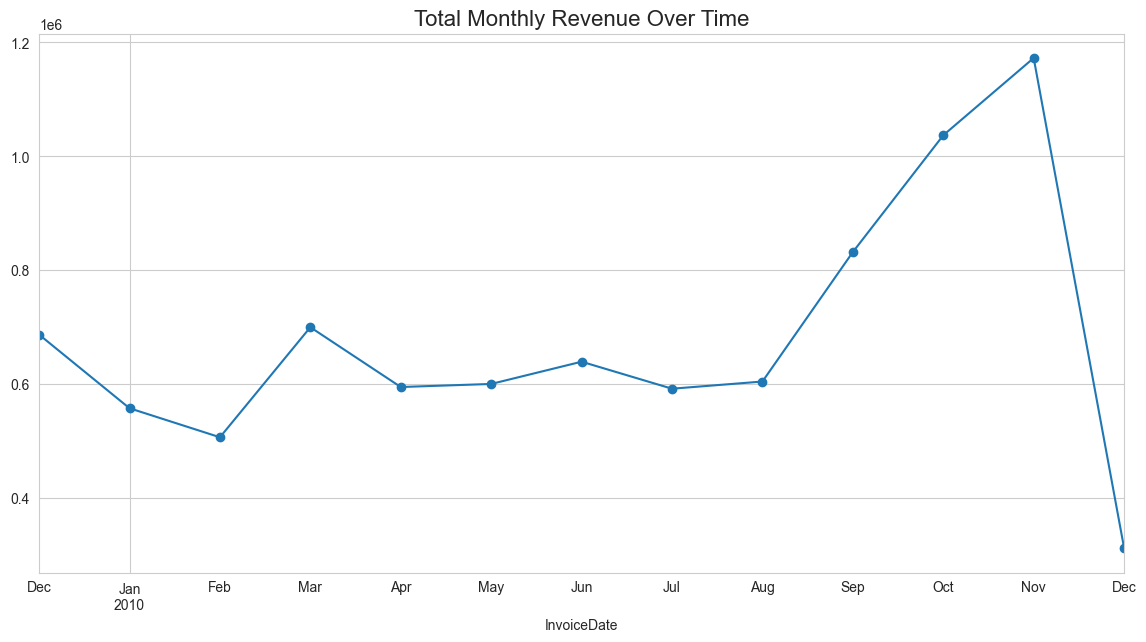

In [32]:
monthly_revenue = df_clean.set_index('InvoiceDate').groupby(pd.Grouper(freq='M'))['Revenue'].sum()
monthly_revenue.plot(kind='line', marker='o', figsize=(14,7))
plt.title('Total Monthly Revenue Over Time', fontsize=16)
plt.show()

EDA Output 2: A Country Pattern (Top 10 Countries by Revenue)

Question: are most of the major markets? 

Pattern: The United Kingdom Market is relatively larger. 

Limitation: The chart does not take into consideration the number of customers or size of the population.

C:\Users\HP\AppData\Local\Temp\ipykernel_21060\3658620711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')


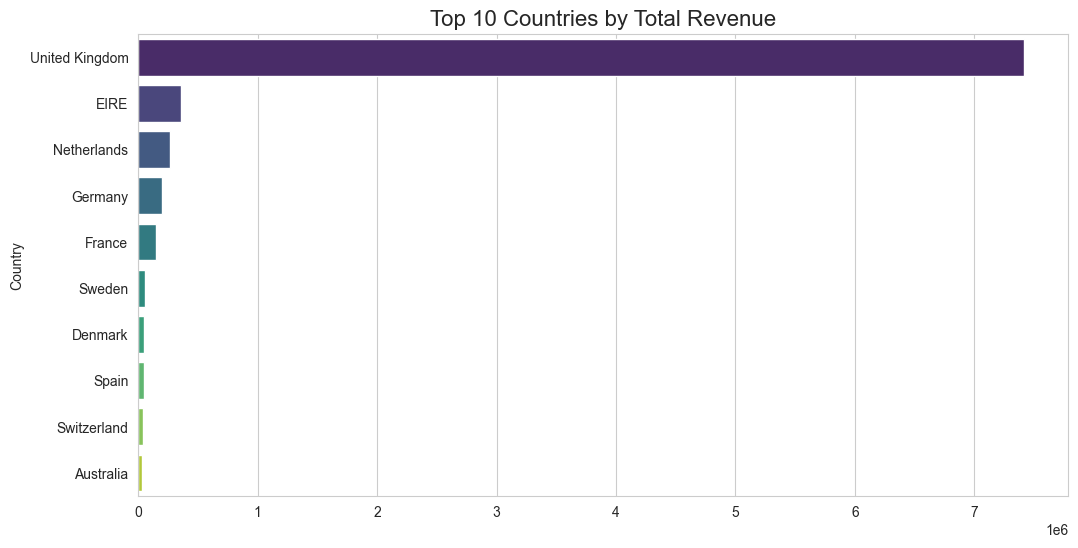

In [33]:
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue', fontsize=16)
plt.show()

EDA Output 3: A Transactional Pattern (Distribution of Invoice Value)

The output shows its transactional structure through its Invoice grouping method. 

Question: What is the typical value of a customer's shopping basket (invoice)? 

Pattern: The distribution shows a strong right-skew because most transactions have low value while the system contains a substantial number of high-value invoices. 

Limitation: The view restricts itself to show information about all customer types which include both retail customers and wholesale customers.

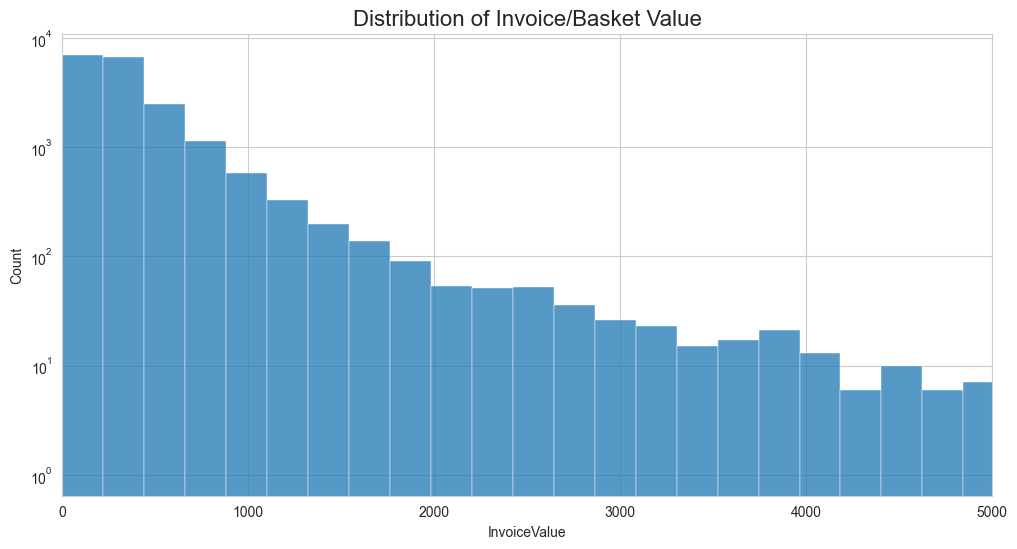

In [34]:
invoice_data = df_clean.groupby('Invoice').agg(InvoiceValue=('Revenue', 'sum')).reset_index()
sns.histplot(invoice_data['InvoiceValue'], bins=200, kde=False)
plt.title('Distribution of Invoice/Basket Value', fontsize=16)
plt.yscale('log')
plt.xlim(0, 5000)
plt.show()

EDA Output 4: A Product Pattern (Top 10 Best-Selling Products)

Question: What products do customers buy in the highest quantities?

Pattern: The best-selling items are general, low-cost giftware or household items.

Limitation: The analysis depends on quantity because it does not include revenue data. A high-volume, low-margin item may seem more important than it is.

C:\Users\HP\AppData\Local\Temp\ipykernel_21060\1794761684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')


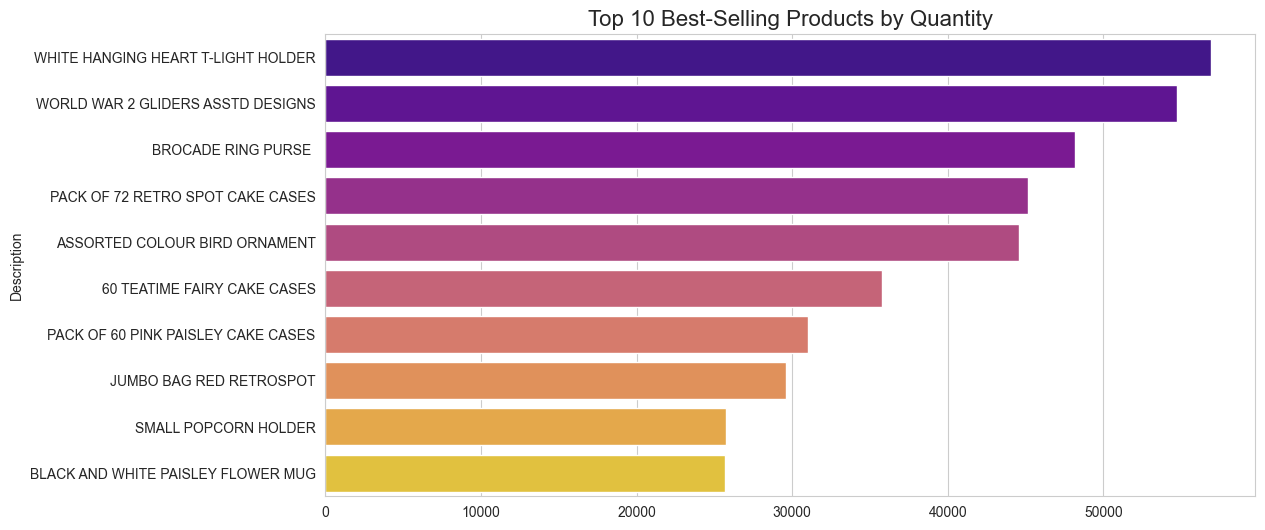

In [35]:
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')
plt.title('Top 10 Best-Selling Products by Quantity', fontsize=16)
plt.show()

EDA Output 5: A Customer Pattern (Top 10 Customers by Revenue)

Question: Who are the most valuable customers by total spending?

Pattern: A limited group of customers generates a major share of the company's revenue. 

Limitation: The static historical view of this information does not show any current events or customer loyalty.

C:\Users\HP\AppData\Local\Temp\ipykernel_21060\3307344151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='cubehelix', order=top_customers.index.astype(str))


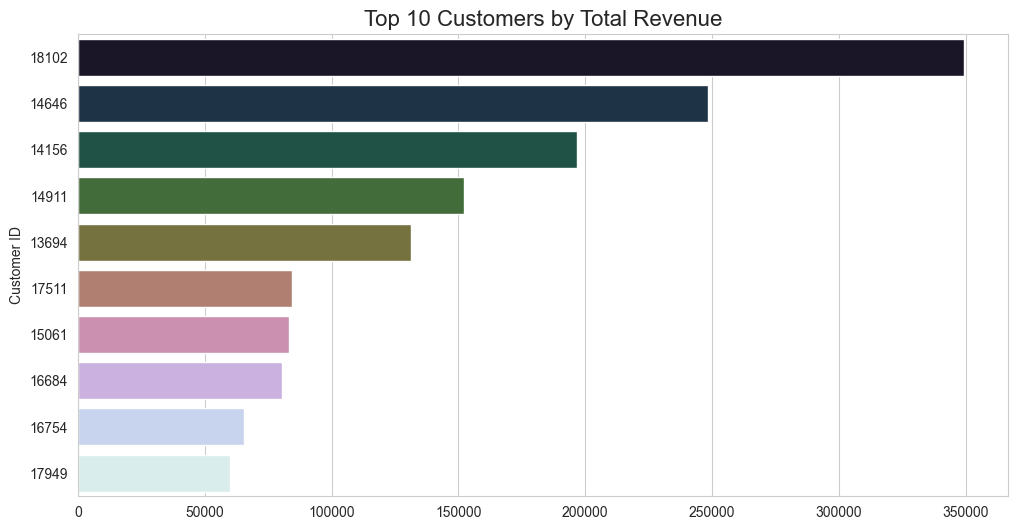

In [36]:
top_customers = df_clean.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='cubehelix', order=top_customers.index.astype(str))
plt.title('Top 10 Customers by Total Revenue', fontsize=16)
plt.show()

Task 6 – Reflection and planning

3 key insights:

1. Seasonal and UK-Centric, the business primarily operates in the UK market which experiences its highest sales volume before Christmas. 

2. The revenue of the business comes from wholesale customers who make up only 10 percent of its client base. 

3. The business model depends on selling decorative items which customers can buy at low prices because these products generate the most sales.

2 assumptions or risks:

1. The data from 2011 serves as a standard for normal business operations according to our assumption. Our findings lose their general applicability because the period studied had exceptional circumstances. 

2. The product descriptions maintain their uniformity according to our assumption. The sales figures for products will be underestimated because of naming inconsistencies which will lead to product identification problems.

Your selected unit of analysis that has been taken up for the forward phase work is the Invoice / Basket.

A brief note on the modelling task you plan to explore next: The Market Basket Analysis will be conducted using invoice-level data to identify which products customers tend to buy together, which will support development of product bundling and recommendation systems.